# FIT5201: Assessment 1
## The Elements of Machine Learning

### Objectives
This assignment consists of three parts (A,B,C) that assess your understanding of model complexity, model selection, uncertainty in prediction with bootstrapping, and probabilistic machine learning. The total marks of this assessment is 100, and will contribute to the 20% of your final score. 

## Important Note
* You can complete your assignment using the codes shared in the unit as a base. However, <font color='red'>**you should make sure the codes you are borrowing are correct and relevant to the question**</font>.

* Please follow the structure of this template as much as you can.

* You can use the prepopulated codes cells or change them if you prefere. However, please do not change the name of the key variables, functions, and parameters eg `knn`, `num.fold`, `train.data`. It helps us to read and understand your submissiont more efficiently.

### Part A.  Model Complexity and Model Selection
In this part, you study the effect of model complexity on the training and testing errors.  You also demonstrate your programming skills by developing a regression algorithm and a cross-validation technique that will be used to select the models with the most effective complexity.

__Background__. A KNN regressor is similar to a KNN classifier (covered in Activity 1.1) in the sence that it finds the K nearest neighbors and estimates the label of the given test point based on the labels of its nearest neighbours. The main difference between KNN regression and KNN classification is that KNN classifier returns the label that has the majority vote in the neighborhood, whilst KNN regressor returns the average of the neighbors’ labels. 

#### Question 1 [KNN Regressor] 
Q1-1) Implement the KNN regressor function:
                                     `knn(train.data, train.label, test.data, K=3)` 
which takes the training data and their labels (continuous values), the test set, and the size of the neighborhood (`K`). It should return the regressed values for the test data points. When choosing the neighbors, you can use the Euclidean distance function to measure the distance between a pair of data points. 

__Hint__: You are allowed to use KNN classifier code from Activity 1 of Module 1.

Q1-2) Plot the training and the testing errors versus `1/K` for `K=1,..,20` in one plot, using the Task1A_train.csv and Task1A_test.csv datasets provided for this assignment. Discuss your findings.

Q1-3) Report the best value for K in terms of the testing error. Discuss the values of K corresponding to underfitting and overfitting based on your plot in Q1-2. 

#### Question 2 [K-fold Cross Validation] 
Q2-1) Implement a K-fold Cross Validation (CV) function for your KNN regressor:  
       `cv(train.data, train.label, numFold=10)` 
which takes the training data and their labels (continuous values), the number of folds, and returns RMSE for different folds of the training data. 

__Hint__: you are allowed to use bootstrap code from Activity 2 of Module 1.

Q2-2) Using the training data, run your K-fold CV where the `numFold` is set to 10. Change the value of `K=1,..,20` and for each K compute the average `10` RMSE values you have got.  Plot the average error numbers versus `1/K` for `K=1,..,20`. Further, add two dashed lines around the average error indicating the average +/- standard deviation of errors. Include the plot in your report. 

Q2-3) Report the values of K that results the minimum average RMSE and minimum standard deviation of RMSE based on your cross validation plot in Q2-2.  Discuss your findings.

## Question 1 [KNN Regressor] 

We load the R libraries required.

In [4]:
## Setup

library('ggplot2')
library('plyr')
library('reshape2')

### Q1-1 Implement the KNN regressor

We define a function to calculate the mean value of the K nearest neighbours based on a distance matrix. And a function to calculate the root mean square error (RMSE).

Below is the KNN function, adapted for regression to return the mean value of the neighbours rather than the most frequent labels. It uses code from Activity 1.1 with some adaptation.

In [5]:
## HElper function
majority <- function(x) {
    
    return(mean(x, rm.na=TRUE))
    
    
}

## KNN Function - adapted from activity 1.1

knn <- function(train.data, train.label, test.data, K=3, distance = 'euclidean'){
  
      test.data <- test.data
      test.label <- data.frame("Y"=0)

      ## count number of train samples
      train.len <- nrow(train.data)

      ## count number of test samples
      test.len <- nrow(test.data)

     
      ## calculate distances between samples
      dist_data <- rbind(test.data, train.data)  # combine training and test data (order is important)

      dist <- dist(dist_data, method= distance)  # calculate the distnaces using the dist function on the combined set

      # convert to a matrix but only take some values
      dist <- as.matrix(dist)[1:test.len, (test.len+1):(test.len+train.len)] 
    
        
        for (i in 1:test.len){
            nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
            test.label[i,]<- (majority(train.label[nn,]))

        }

    
      # apply the find_x function to every row in dist and return it as a list of values
      #test.label <- as.data.frame(apply(dist,1,find_x,K=K))[,1]

      return(test.label[,1])     
    
}


rmse <- function(real.value, estimated.value) {
  
    # We're dealing with a lot of dataframes and sometime they're not the same shape.
    # We only ever expect 1 column in this input so we take the first column to be sure
    
    error <- estimated.value - real.value
    rmse <- sqrt(mean(error^2))
    
    return(rmse)
}

### Q1-2 Plot training and testing errors v.s. 1/K

We load the data, then separate the predictors (train.data and test.data) from the target values (train.value and test.value) for input to the knn regressor function.

Now that we have the functions created, in this section we will load the training and test datasets provided in CSV format and then we will calculate the error functions and plot them on the graph.

It is worth noting that we will assume that the data has already been randomly selected and there are no issues with sample selection.

In [7]:
## Import the data

test <-read.csv("Task1A_test.csv")
train <- read.csv("Task1A_train.csv")

## Update the data to store labels seperately

test.data <- data.frame('X1' = test[,-2]) # we want everything except for the label/y variable. Better to save as frame.
test.label <- data.frame('Y' = test[,2])


train.data <- data.frame('X1'= train[,-2])
train.label <- data.frame('Y' = train[,2])

# set random seed
set.seed(1234)

We calculate the train and test RMSE's for K in 1:20.

In [8]:
# Initiate a dataframe to record RMSE
rmse.df <- data.frame('K'=1:20, 'TrainRMSE'=0, 'TestRMSE'=0)


# calculating rmse... 
for (k in 1:20) {
    
    # training rmse - our RMSe takes real value and predicted value
    # in this case, the real value of the train set is train.label and the 
    # the predicted value is KNN using the training dataset as the "test" dataset to confirm predictions
    rmse.df[k, 'TrainRMSE'] <- rmse(train.label, knn(train.data, train.label, train.data, K=k))
    
    
    # testing rmse - for our testing dataset is to use the test.label as actuals
    # and the test.data for predicted outcomes
    rmse.df[k, 'TestRMSE'] <- rmse(test.label, knn(train.data, train.label, test.data, K=k))
        
}
                                  
head(rmse.df)

K,TrainRMSE,TestRMSE
1,0.0000000,1.299894
2,0.3497031,1.458311
3,0.3103885,1.301972
4,0.3870893,1.361199
5,0.3977682,1.174821
6,0.5321806,1.213655


We plot the training and testing errors.

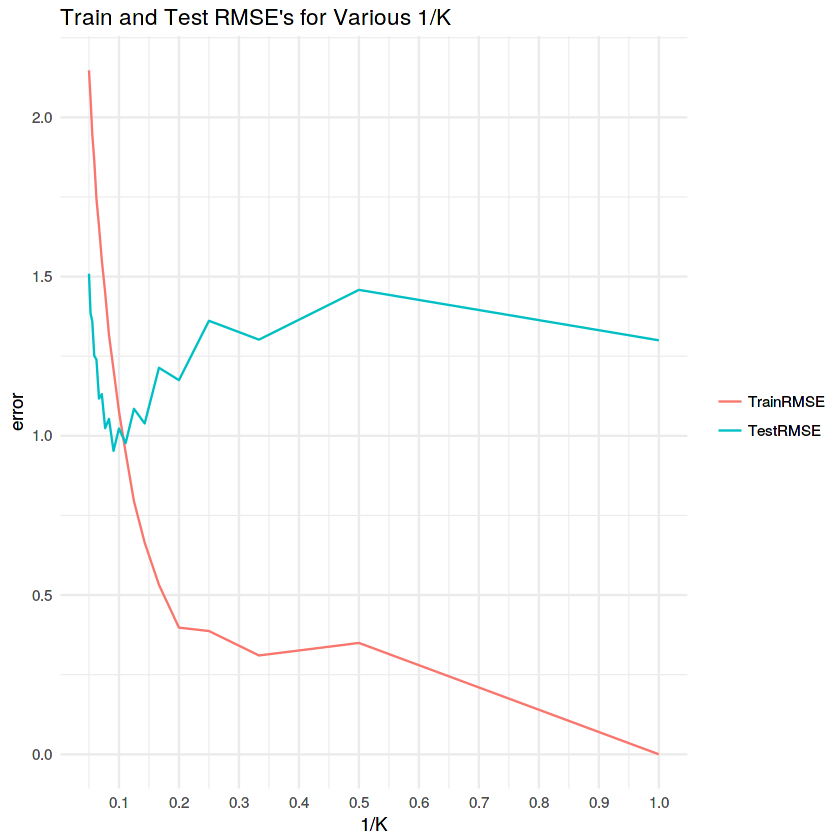

In [9]:
# Reshape if needed
rmse.df.m <- melt(rmse.df, id='K') # reshape for visualization to store all error data in a single column
names(rmse.df.m) <- c('K', 'type', 'error')  # rename for use in ggplot


# Plot
ggplot(data=rmse.df.m, aes(x=1/K, y=error, color=type)) + geom_line() +
       scale_color_discrete(guide=guide_legend(title=NULL)) +
       theme_minimal() +
       scale_x_continuous(breaks=seq(0, 1, 0.1)) +
       ggtitle("Train and Test RMSE's for Various 1/K")

### Q1-3 Report the best K

Our aim here is to choose a value for k that minimises the error rate on the test set with the smallest value of k possible to achieve that outcome (reduce complexity and processing time). 

We see that for small values of k the training error is very low but the test error is high, indicating that the data is being overfitted. As k increases the overfit reduces and for values greater than K=10 the training predictions start to perform badly again indicating under-fitting.

Therefore we would choose a value of K between 9-13 where the test error is at its lowest. The most optimal choice for K would be 11 where test error is the smallest however this has more training error than other values such as 9 and should be considered carefully. It is possible that the test data also has noise that the data fits will to.

## Question 2 [K-fold Cross Validation]

### Q2-1 Implement a K-fold cross validation

We define a function to segment a dataset into a given number of folds for K-fold cross validation to determine the most suitable value for the number of nearest neighbours K considering all the folds.

The hint the question suggests using bootstrap in the sample process. Here we will avoid that to ensure that each datapoint is only ever used in 1 hold-out sample.

In [10]:
cv <- function (train.data, train.label, num.fold=10, K=3){
    
   
    # Set-up some common variables
    L <- num.fold # rename for ease of use
    N <- nrow(train.data)  # this is the size of the dataset
    
    
    # Initiate a dataframe to record RMSE for the dataset
    rmse.df <- data.frame('K'=1:K, 'L'=1:L, 'RMSE'=rep(0, L * K))
    
    # In CV we split the entire dataset into L number of folds
    dev.size = floor(N / L) # number of samples reserved for validation

    # Combine the data and label information so they can be shuffled
    # Randomly shuffle the training data so there's no bias in the selection
    data <- cbind(train.data,train.label)
    data <- data[sample(1:nrow(data),nrow(data)),]
    
    # Update the inputs with the shuffled data - need to give them a different name so they don't overwrite
    # later when using train.data and train.label
    
    train.data.master <- data.frame("X1"= data[,1])
    train.label.master <- data.frame("Y" = data[,2])
    

    # To perform the CV we need to split the data into the dev and train sets each time
    # each "dev" is a section of indicies of size dev.size. We take each iteration l and multiply it
    # by dev size to find the upper bound of our current index. We then subtract dev.size -1 to find the lower bound
    # because R is inclusive in its ranges. The train.indicies becomes 1:N without dev.indicies included
    # For example, if L = 10 and N = 100 then dev.size = 10
    # For the first chunck of data l = 1 and therefore we get the index (1*10) - (1*10-1) = 1 : 1*10 = 1:10
    # For the second chunk of data l =2 and therefore we get the index (2*10)-(1*10-1) = 11: 2*10 = 11:20
    # We could just do 1 + dev.size but that won't work in the case of l = 1
    
   
    for (l in 1:L) {
        
        dev.indices <- ((l*dev.size)-(dev.size-1)):(l*dev.size)
        train.indices <- (1:N)[-dev.indices]

        
        # Need to grab the actual values for use in the KNN algorithm
        # Store these as a data.frame so they pass to the other functions just like the base data
        # does. Interestingly R doesn't store them as DF when they're converted.
        dev.data <- data.frame("X1" = train.data.master[dev.indices,])
        dev.label <- data.frame("Y" = train.label.master[dev.indices,])
        
       
        train.data <- data.frame("X1" = train.data.master[-dev.indices,])
        train.label <- data.frame("Y" = train.label.master[-dev.indices,])

        # for each value of k...
        for (k in 1:K) {
            
            #### calculate iteration index i. This is simply which row the iteration is up to
            #### The index is of size K*L so as an example on the first few loops we get:
            #### k = 1, l = 1, L=10 ... i <- (1-1)*L+l = (0)*10+1 = 1
            #### k = 1, l = 2, L=10 ... i <- (1-1)*L+l = (0)*10+2 = 2
            
            i <- (k-1)*L+l # calculate the index that corresponds to this iteration
           
            
            # training rmse - our RMSe takes real value and predicted value
            # in this case, the real value of the train set is train.label and the 
            # the predicted value is KNN using the training dataset as the "test" dataset to confirm predictions
            rmse.df[i,'K'] <- k
            rmse.df[i,'L'] <- l

            ## Calculate the RMSE which is "The average of the obtained validation errors is used as an 
            # estimation of the testing error." according to the course notes.
            rmse.df[i,'RMSE'] <- rmse(dev.label, knn(train.data, train.label, dev.data, K=k))


        }
    
    }
    
                  
    return(rmse.df)
}

Now we will run the CV and save it

In [11]:
K <- 20 # maximum number of nearest neighbours
L <- 10 # number of folds in cross validation


#cv(train.data, train.label, num.fold=L,K=K)

cv_run <- cv(train.data, train.label, num.fold=L,K=K)
head(cv_run)


K,L,RMSE
1,1,0.5655307
1,2,0.3902563
1,3,1.1222968
1,4,0.6868952
1,5,0.1507481
1,6,0.4195831


### Q2-2 Plot RMSE v.s. 1/K

Here we will plot the RMSE vs 1/K on a graph

K,RMSE,sdlower,sdupper
1,0.5791388,0.31393826,0.8443394
2,0.4678830,0.31671454,0.6190515
3,0.5632999,0.38018755,0.7464122
4,0.4574927,0.19948756,0.7154978
5,0.4786363,0.09307968,0.8641929
6,0.7175434,0.25258083,1.1825060


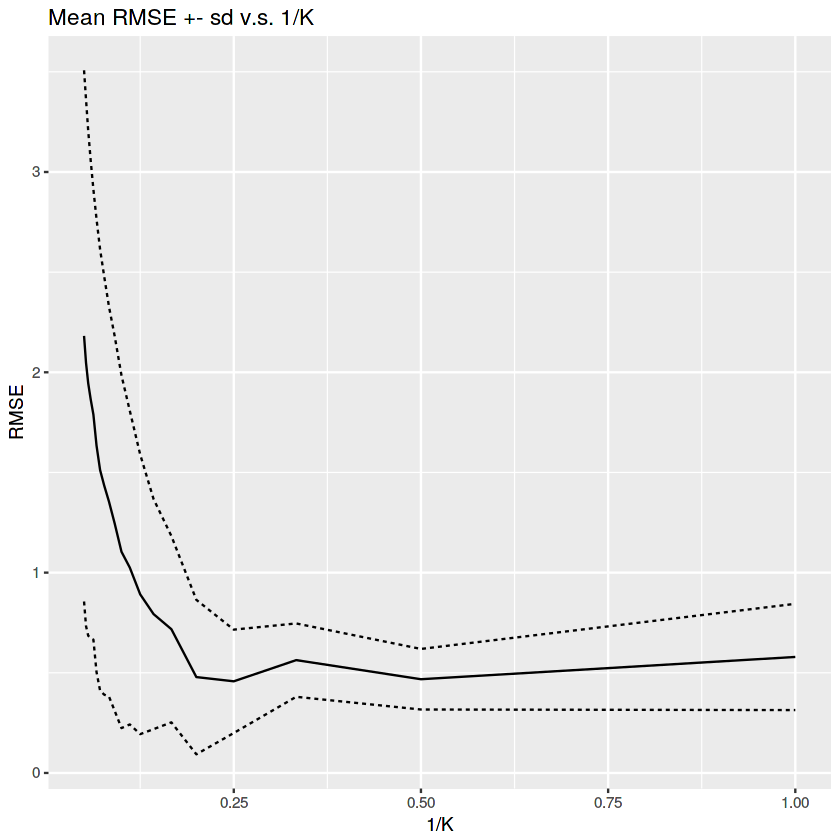

In [12]:
## Take the average values
# We will calculate the mean and standard deviation using aggregate.
# The aggregate function will group by K and we drop the L column because it isn't necessary
avg_mse <- aggregate(.~ K, data=cv_run[,-2], mean)
sd_mse <- aggregate(.~ K, data=cv_run[,-2], sd)

# Simply  add and subtract the upper and lower values
avg_mse$sdlower <- avg_mse$RMSE - sd_mse$RMSE
avg_mse$sdupper <- avg_mse$RMSE + sd_mse$RMSE

head(avg_mse)


# Plot the RMSE vs 1/K
ggplot(data=avg_mse, aes(x=1/K, y=RMSE)) + geom_line() +
       geom_line(data = avg_mse, aes(x=1/K, y=sdlower), linetype="dashed") +
       geom_line(data = avg_mse, aes(x=1/K, y=sdupper), linetype="dashed") +
       ggtitle("Mean RMSE +- sd v.s. 1/K")

### Q2-3 Report the best K

The trend of the above curve shows that for lower values of K the RMSE rate is very high and the sd is similarly wide. As k increases toward 3 the error decreases gradually until K=4 where RMSE is at its lowest point. The error rate starts to increase gradually for K>4 and exponentially when K>7.

Interesting the sd increases when K=2 and K=4, suggesting that the results varied quite a bit more than the other implementations.

### Part B. Prediction Uncertainty with Bootstrapping
This part is the adaptation of Activity 2 from KNN classification to KNN regression. You use the bootstrapping technique to quantify the uncertainty of predictions for the KNN regressor that you implemented in Part A. 

#### Question 3 [Bootstrapping]
Q3-1) Modify the code in Activity 2 to handle bootstrapping for KNN regression. 

Q3-2) Load `Task1B_train.csv` and `Task1B_test.csv` sets. Apply your bootstrapping for KNN regression with `times = 100` (the number of subsets), `size = 25` (the size of each subset), and change `K=1,..,20` (the neighbourhood size). Now create a boxplot where the x-axis is `K`, and the y-axis is the average error (and the uncertainty around it) corresponding to each K.  

Q3-3) Based on your plot in Q3-2, how does the test error and its uncertainty behave as `K` increases? 

Q3-4) Load `Task1B_train.csv` and `Task1B_test.csv` sets. Apply your bootstrapping for KNN regression with `K=5` (the neighbourhood size), `size = 25` (the size of each subset), and change `times = 10, 20, 30,.., 200` (the number of subsets). Now create a boxplot where the x-axis is `times`, and the y-axis is the average error (and the uncertainty around it) corresponding to each value of `times`.  

Q3-5) Based on your plot in Q3-4, how does the test error and its uncertainty behave as the number of subsets in bootstrapping increases? 

## Question 3 [Bootstrapping] 

### Q3-1 Implement KNN regression with bootstrapping

We define a function that randomly sample row indices with replacement from a given dataset.

In [13]:
boot <- function (original.size=100, sample.size=10, times=100){
    
    indx <- matrix(nrow=times, ncol=sample.size)  #create an empty matrix with number of times as rows and sample size as cols
    
    # for each row in the empty matrix, return a sample with replacement of size sample.size from 1 to original.size
    # in this example, it is sample 10 numbers from 1:100 with replacement a total of 5 times
    
    for (t in 1:times){
        
        indx[t, ] <- sample(x=original.size, size=sample.size, replace = TRUE) # update each row
        
    }
    
    return(indx)
    
}

#test it
boot(100, 10, 5)

32,63,33,51,68,49,25,77,8,31
72,51,16,51,50,76,18,85,87,5
32,2,24,71,31,51,6,57,13,90
2,79,9,52,39,8,33,67,93,48
15,55,20,90,39,32,17,90,17,91


We load the data, then separate the predictors from the target values for input to the knn regressor function.

In [14]:
# Load the datasets - we assume they are in the working directory
train.data <- read.csv("Task1B_train.csv")
test.data <- read.csv("Task1B_test.csv")

# Split dependent and independent attributes
train.label <- data.frame("Y" = train.data[,5])
train.data <- as.data.frame(train.data[,-5])

test.label <- data.frame("Y"=test.data[,5])
test.data <-  as.data.frame(test.data[,-5])

train.len <- nrow(train.data)
test.len <- nrow(test.data)

# set random seed
set.seed(1234)

Now we perform the bootstrapping

### Q3-2 Plot bootstrapping KNN regression for different number of nearest neighbours

In [15]:
K <- 20             # Maximum K for KNN
L <- 100            # Number of bootstrapped samples
N <- 25             # Size of bootstrapped samples


boot.indx <- boot(nrow(train.data), N, L)


# Initiate a dataframe to record RMSE
rmse.df <- data.frame('K'=1:K, 'L'=1:L, 'TestRMSE'=rep(0,K*L))


# calculating rmse... 
for (k in 1:K) {
    
     for (l in 1:L){
        
        #### calculate iteration index i. This is simply which row the iteration is up to
        #### The index is of size L*K so as an example on the first few loops we get:
        #### k = 1, l = 1, L=40 ... i <- (1-1)*L+l = (0)*40+1 = 1
        #### k = 1, l = 2, L=40 ... i <- (1-1)*L+l = (0)*40+2 = 2
        
        i <- (k-1)*L+l
        
        #### save sample indices that were selected by bootstrap above. We use these sample indicies
        ### to select training examples to pass to our knn algoirthm.
        indx <- boot.indx[l,]
         
        
        #### save the value of k and l --- Why is this necessary? They were already filled with values??? 
        ### We could just calculate the whole dataset as a single matrix with the values already passed
        
        #### Here the original values of k and l are ignored and instead the iteration value is passed
        #### This prevents any issues with sequencing
        rmse.df[i,'K'] <- k
        rmse.df[i,'L'] <- l

        # testing rmse - for our testing dataset is to use the test.label as actuals
        # and the test.data for predicted outcomes
        rmse.df[i, 'TestRMSE'] <- rmse(test.label, knn(train.data[indx,], data.frame("Y"=train.label[indx,]), test.data, K=k))
       
     } 
}


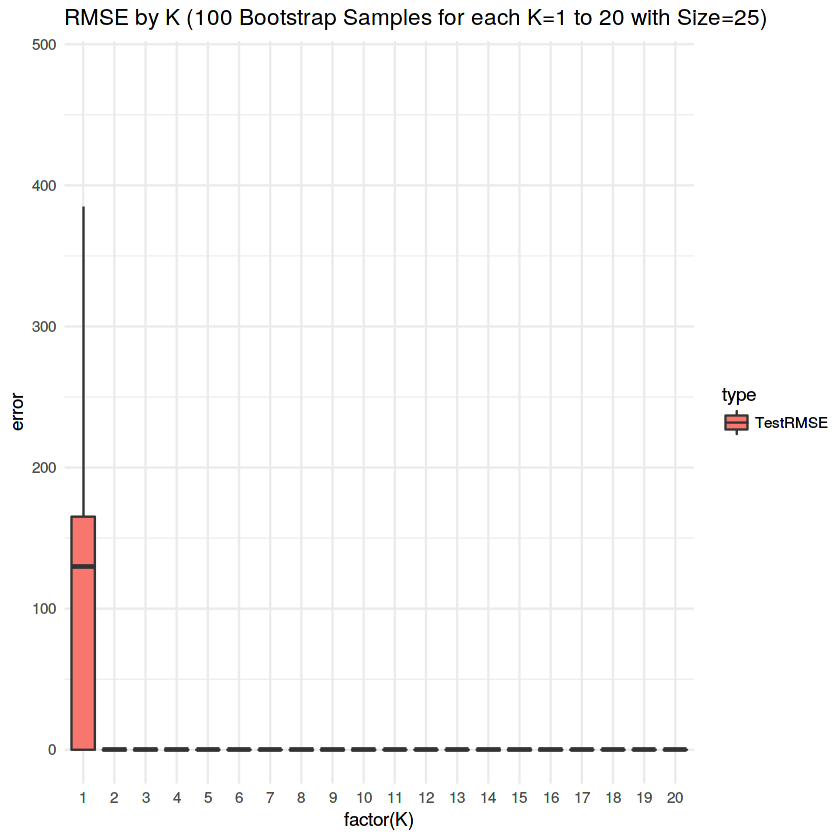

In [16]:
# Apply bootstrapping for KNN regression with 100 bootstrapped datasets, 
# each having 25 samples, and maximum number of neighbours 20


# Reshape if needed
rmse.df.m <- melt(rmse.df, id=c('K','L')) # reshape for visualization to store all error data in a single column
names(rmse.df.m) <- c('K','L','type', 'error')  # rename for use in ggplot


ggplot(data=rmse.df.m[rmse.df.m$type == 'TestRMSE',], aes(x=factor(K), y=error,fill=type)) + 
    geom_boxplot(outlier.shape = NA) + 
    scale_color_discrete(guide = guide_legend(title = NULL)) +
    theme_minimal() +
    ggtitle('RMSE by K (100 Bootstrap Samples for each K=1 to 20 with Size=25)')


### Q3-3 Results interpretation

The boxplot takes quite a while to run. When it does, as K increases so does the average error and the overall variability of the error itself. This supports the idea that smaller values of K prevent underfitting.

N.B. After clearing the notebook and re-running I ran out of time to let it run the full measure

### Q3-4 Plot bootstrapping KNN regression for different number of bootstrapped datasets

Q3-4) Load Task1B_train.csv and Task1B_test.csv sets. Apply your bootstrapping for KNN regression with K=5 (the neighbourhood size), size = 25 (the size of each subset), and change times = 10, 20, 30,.., 200 (the number of subsets). Now create a boxplot where the x-axis is times, and the y-axis is the average error (and the uncertainty around it) corresponding to each value of times.

Here we will apply the bootstrapping for K=5 fixed for a series of changes in times from 10-200 in increaments of 10.

In [25]:
K <- 5                # k nearest neighbours
N <- 25                # Size of bootstrapped samples
max.sample.size = 200  # Maximum size of sampling

# initialise a boot index for the first 10

boot.indx <- boot(nrow(train.data), N, 10)

# Initiate a dataframe to record RMSE
rmse.df <- data.frame('Times'=seq(10,200,10), 'L'=rep(0,2100), 'TestRMSE'=rep(0,2100))

i <- 0  # initiate a counter

for (s in 1:10){

   
    # Simply update the boot index by 10 each time around the loop and add to the existing 10
    boot.indx <- rbind(boot.indx,boot(nrow(train.data), N, 10))
    
   
    # Set up the variables
    
    # in each loop we want to keep incrementing the counter
    
    i <- i+ 1
    
    # calculating rmse... we simply need to run the algoirthm for each of the splits of times
    # There are 20 in total
         for (l in 1:(s*10)){

             # work out the index
            

            #### save sample indices that were selected by bootstrap above. We use these sample indicies
            ### to select training examples to pass to our knn algoirthm.
            indx <- boot.indx[l,]


            #### save the value of k and l --- Why is this necessary? They were already filled with values??? 
            ### We could just calculate the whole dataset as a single matrix with the values already passed

            #### Here the original values of k and l are ignored and instead the iteration value is passed
            #### This prevents any issues with sequencing
            rmse.df[i,'Times'] <- (s*10)
            rmse.df[i,'L'] <- l

            # testing rmse - for our testing dataset is to use the test.label as actuals
            # and the test.data for predicted outcomes
            rmse.df[i, 'TestRMSE'] <- rmse(test.label, knn(train.data[indx,], data.frame("Y"=train.label[indx,]), test.data, K=5))
            i <- i+1  # in each sub loop we also increment
             
             } 

        }


rmse.df


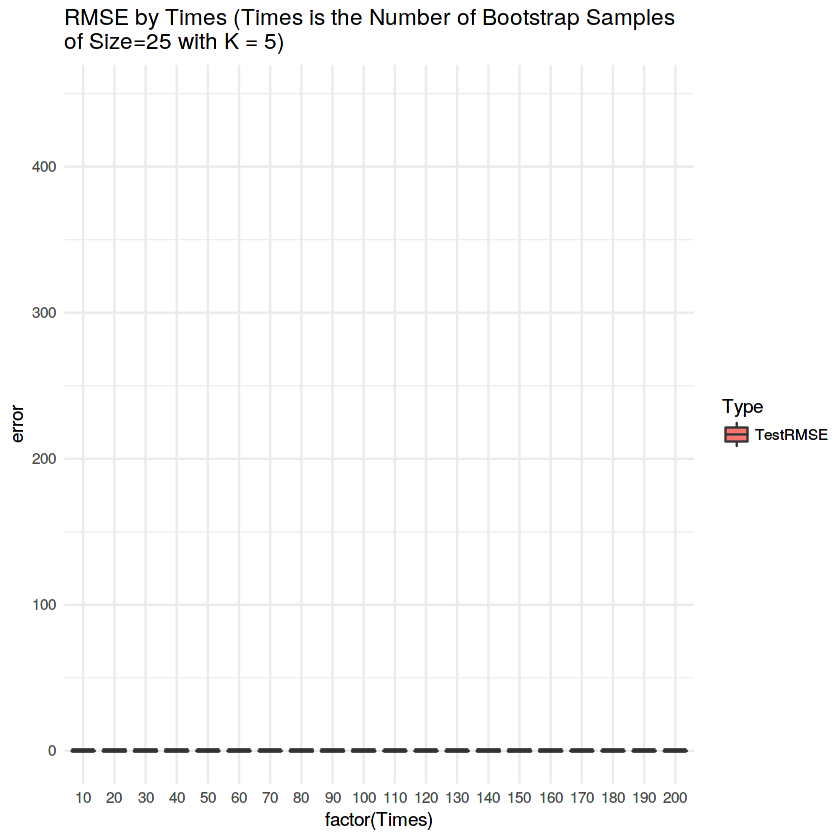

In [27]:
# Reshape if needed
rmse.df.m <- melt(rmse.df, id=c('Times','L')) # reshape for visualization to store all error data in a single column
names(rmse.df.m) <- c('Times','L','Type', 'error')  # rename for use in ggplot


ggplot(data=rmse.df.m[rmse.df.m$Type == "TestRMSE",], aes(factor(Times), error,fill=Type)) + 
    geom_boxplot(outlier.shape = NA) + 
    scale_color_discrete(guide = guide_legend(title = NULL)) +
    theme_minimal() +
    ggtitle('RMSE by Times (Times is the Number of Bootstrap Samples\nof Size=25 with K = 5)')

### Q3-3 Results interpretation

I wasn't able to get the code to run in time, given the processing time required. I also wasn't able to find the part of my code causing such long dealys in time allotted.

I would expect to see the variability reducing for K=5 as the number of samples increases toward 100, suggesting that a larger number of random samples helps to improve model variation.

### Part C. Probabilistic Machine Learning
In this part, you show your knowledge about the foundation of the probabilistic machine learning (i.e. probabilistic inference and modeling) by solving one simple but basic statistical inference problems. Solve the following problem based on the probability concepts you have learned in Module 1 with the same math conventions. Please show your work in your report. Also, there are two conceptual questions.

#### Question 4 [Bayes Rule] 
Recall the simple example from Appendix A of Module 1. Suppose we have one red and one blue box. In the red box we have 2 apples and 6 oranges, whilst in the blue box we have 3 apples and 1 orange. Now suppose we randomly selected one of the boxes and picked a fruit. If the picked fruit is an apple, what is the probability that it was picked from the blue box?

Note that the chance of picking the red box is 40% and the selection chance for any of the pieces from a box is equal for all the pieces in that box.

## Question 4 [Bayes Rule] 

In [28]:
# We can effectively draw a probability tree in code

# Branch 1
p_red = 0.40
p_blue = 1-p_red

# Branch 2
p_apple_blue = 3/4
p_apple_red = 1/4

#Branch 3
# The probability of getting an apple is the sum of the branches where apple is the outcome
p_apple = p_apple_blue*p_blue + p_apple_red*p_red


# Therefore we can cacluate p(B union A)
p_apple_given_blue = p_blue * p_apple_blue


# We know that P(B|A) = P(Blue Union Apple) / P(Apple)
p_blue_given_apple = p_apple_given_blue / p_apple

p_blue_given_apple

[1] 0.8181818

In the above solution we see that there is an 81.81% chance that the box is blue if an apple is chosen. This is because the probability of selecting an apple once the blue box is selected is so high. We take advantage of the product rule, complement rule and the conditional probability rule to obtain our answer.  